# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

"""from gensim.models import Word2Vec
from gensim.models import KeyedVectors"""
import pickle

#from tqdm import tqdm
import os
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler

"""from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter"""

'from plotly import plotly\nimport plotly.offline as offline\nimport plotly.graph_objs as go\noffline.init_notebook_mode()\nfrom collections import Counter'

## 1.1 Reading Data

In [2]:
import pandas as pd
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]

In [5]:
#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)

sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kc: kc[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### Limiting data poits to 50K due to system constrain

In [17]:
project_data = project_data.iloc[0:50000,:]
X=project_data.drop(columns=["project_is_approved"])
Y=project_data["project_is_approved"]


In [20]:
X["project_grade_category"].value_counts()

Grades PreK-2    20671
Grades 3-5       17068
Grades 6-8        7543
Grades 9-12       4718
Name: project_grade_category, dtype: int64

In [21]:
X["project_grade_category"][X["project_grade_category"]=="Grades PreK-2"]="GradeA"
X["project_grade_category"][X["project_grade_category"]=="Grades 3-5"]="GradeB"
X["project_grade_category"][X["project_grade_category"]=="Grades 6-8"]="GradeC"
X["project_grade_category"][X["project_grade_category"]=="Grades 9-12"]="GradeD"

In [22]:
X.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay'],
      dtype='object')

## Preprocessing of `essay'

In [23]:
# Combining all the above stundents 
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in (X['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

In [24]:
X['essay']=preprocessed_essays

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [25]:
# Combining all the above stundents 
#from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in (X['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

In [26]:
X['project_title']=preprocessed_project_title

## 1.5 Preparing data for models

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# TASK: Naive Bayes

<ol>
    <li><strong>Apply Multinomial NaiveBayes on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning(find best Alpha)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Consider a wide range of alpha values for hyperparameter tuning, start as low as 0.00001</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Find the top 10 features of positive class and top 10 features of negative class for both feature sets <font color='red'>Set 1</font> and <font color='red'>Set 2</font> using values of `feature_log_prob_` parameter of  <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>MultinomialNB</a> and print their corresponding feature names</li>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure. Here on X-axis you will have alpha values, since they have a wide range, just to represent those alpha values on the graph, apply log function on those alpha values.
    <></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <>
    </li>
        </ul>
</ol>

<h1>2. Naive Bayes </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [27]:
# splitting data into train and test
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20, random_state=42,stratify=Y)
X_train,X_cv,Y_train,Y_cv=train_test_split(X_train,Y_train,test_size=0.20, random_state=42,stratify=Y_train)

C:\Users\sanjana\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
for i in [X_train,Y_train,X_cv,Y_cv,X_test,Y_test]:
    print(i.shape)

(32000, 17)
(32000,)
(8000, 17)
(8000,)
(10000, 17)
(10000,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

#### Encoding project_subject categorical

In [29]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=True, binary=True)
categories_one_hot_X_train = vectorizer.fit_transform(X_train['clean_categories'])
categories_one_hot_X_cv = vectorizer.transform(X_cv['clean_categories'])
categories_one_hot_X_test = vectorizer.transform(X_test['clean_categories'])
print(vectorizer.get_feature_names())
print("categories_one_hot_X_train : {0} \ncategories_one_hot_X_cv : {1} \ncategories_one_hot_X_test : {2} ".format(categories_one_hot_X_train.shape,categories_one_hot_X_cv.shape,categories_one_hot_X_test.shape))

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
categories_one_hot_X_train : (32000, 9) 
categories_one_hot_X_cv : (8000, 9) 
categories_one_hot_X_test : (10000, 9) 


#### Encoding project_subject  sub categorical

In [30]:
# we use count vectorizer to convert the values into one clean_subcategories
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot_X_train = vectorizer.fit_transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_X_cv = vectorizer.transform(X_cv['clean_subcategories'].values)
sub_categories_one_hot_X_test = vectorizer.transform(X_test['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("sub_categories_one_hot_X_train : {0}\nsub_categories_one_hot_X_cv : {1}\nsub_categories_one_hot_X_test : {2}".\
      format(sub_categories_one_hot_X_train.shape,sub_categories_one_hot_X_cv.shape,sub_categories_one_hot_X_test.shape))

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
sub_categories_one_hot_X_train : (32000, 30)
sub_categories_one_hot_X_cv : (8000, 30)
sub_categories_one_hot_X_test : (10000, 30)


#### Encoding school_state categorical

In [31]:
# we use count vectorizer to convert the values into one school_state
vectorizer = CountVectorizer()
school_state_one_hot_X_train = vectorizer.fit_transform(X_train['school_state'].values)
school_state_one_hot_X_cv = vectorizer.transform(X_cv['school_state'].values)
school_state_one_hot_X_test = vectorizer.transform(X_test['school_state'].values)
print(vectorizer.get_feature_names())
print("school_state_one_hot_X_train : {} \nschool_state_one_hot_X_cv : {} \nschool_state_one_hot_X_test : {}".\
      format(school_state_one_hot_X_train.shape,school_state_one_hot_X_cv.shape,school_state_one_hot_X_test.shape))

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
school_state_one_hot_X_train : (32000, 51) 
school_state_one_hot_X_cv : (8000, 51) 
school_state_one_hot_X_test : (10000, 51)


#### Encoding teacher_prefix categorical

In [32]:
# we use count vectorizer to convert the values into one hot encoded features
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False, binary=True,encoding='utf-8',vocabulary=['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher'])
vectorizer.fit(X_train['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())


teacher_prefix_one_hot_X_train = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
teacher_prefix_one_hot_X_cv = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
teacher_prefix_one_hot_X_test = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))

print("teacher_prefix_one_hot_X_train : {} \nteacher_prefix_one_hot_X_cv : {} \nteacher_prefix_one_hot_X_test : {}".\
      format(teacher_prefix_one_hot_X_train.shape,teacher_prefix_one_hot_X_cv.shape,teacher_prefix_one_hot_X_test.shape))

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
teacher_prefix_one_hot_X_train : (32000, 5) 
teacher_prefix_one_hot_X_cv : (8000, 5) 
teacher_prefix_one_hot_X_test : (10000, 5)


#### Encoding project_grade_category categorical

In [33]:
# we use count vectorizer to convert the values into one project_grade_category
vectorizer = CountVectorizer(lowercase=False,)

grade_one_hot_X_train=vectorizer.fit_transform(X_train["project_grade_category"])
grade_one_hot_X_cv=vectorizer.fit_transform(X_cv["project_grade_category"])
grade_one_hot_X_test=vectorizer.fit_transform(X_test["project_grade_category"])

vectorizer.get_feature_names()
print("grade_one_hot_X_train : {} \ngrade_one_hot_X_cv : {} \ngrade_one_hot_X_test : {}".\
      format(grade_one_hot_X_train.shape,grade_one_hot_X_cv.shape,grade_one_hot_X_test.shape))

grade_one_hot_X_train : (32000, 4) 
grade_one_hot_X_cv : (8000, 4) 
grade_one_hot_X_test : (10000, 4)


In [34]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [35]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
"""price_standardized_X_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
price_standardized_X_cv = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
price_standardized_X_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))"""
price_standardized_X_train = X_train['price'].values.reshape(-1, 1)
price_standardized_X_cv = X_cv['price'].values.reshape(-1, 1)
price_standardized_X_test = X_test['price'].values.reshape(-1, 1)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

#### Bag of words

In [36]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
essay_bow_X_train = vectorizer.fit_transform(X_train["essay"])
essay_bow_X_cv = vectorizer.transform(X_cv["essay"])
essay_bow_X_test = vectorizer.transform(X_test["essay"])

print("essay_bow_X_train : {} \nessay_bow_X_cv : {} \nessay_bow_X_test : {}".\
      format(essay_bow_X_train.shape,essay_bow_X_cv.shape,essay_bow_X_test.shape))

essay_bow_X_train : (32000, 10071) 
essay_bow_X_cv : (8000, 10071) 
essay_bow_X_test : (10000, 10071)


In [37]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
project_title_bow_X_train = vectorizer.fit_transform(X_train["project_title"])
project_title_bow_X_cv = vectorizer.transform(X_cv["project_title"])
project_title_bow_X_test = vectorizer.transform(X_test["project_title"])

print("project_title_bow_X_train : {} \nproject_title_bow_X_cv : {} \nproject_title_bow_X_test : {}".\
      format(project_title_bow_X_train.shape,project_title_bow_X_cv.shape,project_title_bow_X_test.shape))

project_title_bow_X_train : (32000, 1458) 
project_title_bow_X_cv : (8000, 1458) 
project_title_bow_X_test : (10000, 1458)


#### TFIDF vectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
essay_tfidf_X_train = vectorizer.fit_transform(X_train["essay"])
essay_tfidf_X_cv = vectorizer.transform(X_cv["essay"])
essay_tfidf_X_test = vectorizer.transform(X_test["essay"])

print("essay_tfidf_X_train : {} \nessay_tfidf_X_cv : {} \nessay_tfidf_X_test : {}".\
      format(essay_tfidf_X_train.shape,essay_tfidf_X_cv.shape,essay_tfidf_X_test.shape))

essay_tfidf_X_train : (32000, 10071) 
essay_tfidf_X_cv : (8000, 10071) 
essay_tfidf_X_test : (10000, 10071)


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
project_title_tfidf_X_train = vectorizer.fit_transform(X_train["project_title"])
project_title_tfidf_X_cv = vectorizer.transform(X_cv["project_title"])
project_title_tfidf_X_test = vectorizer.transform(X_test["project_title"])

print("project_title_tfidf_X_train : {} \nproject_title_tfidf_X_cv : {} \nproject_title_tfidf_X_test : {}".\
      format(project_title_tfidf_X_train.shape,project_title_tfidf_X_cv.shape,project_title_tfidf_X_test.shape))

project_title_tfidf_X_train : (32000, 1458) 
project_title_tfidf_X_cv : (8000, 1458) 
project_title_tfidf_X_test : (10000, 1458)


<h2>2.4 Appling NB() on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Naive Bayes on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [40]:
categorical_numerical_features_X_train=[categories_one_hot_X_train,sub_categories_one_hot_X_train,school_state_one_hot_X_train,\
                                        teacher_prefix_one_hot_X_train,grade_one_hot_X_train,price_standardized_X_train]

categorical_numerical_features_X_cv=[categories_one_hot_X_cv,sub_categories_one_hot_X_cv,school_state_one_hot_X_cv,\
                                        teacher_prefix_one_hot_X_cv,grade_one_hot_X_cv,price_standardized_X_cv]

categorical_numerical_features_X_test=[categories_one_hot_X_test,sub_categories_one_hot_X_test,school_state_one_hot_X_test,\
                                        teacher_prefix_one_hot_X_test,grade_one_hot_X_test,price_standardized_X_test]

In [43]:
categorical_numerical_features_X_train_stack= hstack(categorical_numerical_features_X_train)
categorical_numerical_features_X_cv_stack = hstack(categorical_numerical_features_X_cv)
categorical_numerical_features_X_test_stack= hstack(categorical_numerical_features_X_test)

#### Creating list of  featuers in the same order which we are going to stacked data in SET1

In [44]:
categorical_numerical_feature_list=['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language',\
             'Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy',\
             'ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy',\
             'Dr', 'Mr', 'Mrs', 'Ms', 'Teacher',\
             'GradeA','GradeB','GradeC','GradeD',\
             'Price']

In [45]:
vectorizer_essay_bow = CountVectorizer(min_df=10)
essay_bow_ = vectorizer_essay_bow.fit_transform(X_train["essay"])
essay_bow_featuers = vectorizer_essay_bow.get_feature_names()
len(essay_bow_featuers)

10071

In [46]:
vectorizer_project_title_bow = CountVectorizer(min_df=10)
essay_bow_ = vectorizer_project_title_bow.fit_transform(X_train["project_title"])
project_title_bow_featuers = vectorizer_project_title_bow.get_feature_names()
len(project_title_bow_featuers)

1458

In [47]:
all_featuers = np.hstack((categorical_numerical_feature_list,essay_bow_featuers,project_title_bow_featuers))
print(len(all_featuers))

11629


### 2.4.1 Applying Naive Bayes on BOW,<font color='red'> SET 1</font>

In [48]:
print("Categorical_numerical_features_X_train_stack :{0}\nCategorical_numerical_features_X_cv_stack :{1}\
        \nCategorical_numerical_features_X_test_stack :{2}\
        \nEssay_bow_X_train :{3}\nEssay_bow_X_cv :{4}\nEssay_bow_X_test :{5}\
        \nProject_title_bow_X_train :{6}\nProject_title_bow_X_cv :{7}\nProject_title_bow_X_test :{8}".\
        format(categorical_numerical_features_X_train_stack.shape,\
         categorical_numerical_features_X_cv_stack.shape,\
         categorical_numerical_features_X_test_stack.shape,\
         essay_bow_X_train.shape,essay_bow_X_cv.shape,essay_bow_X_test.shape,\
         project_title_bow_X_train.shape,project_title_bow_X_cv.shape,project_title_bow_X_test.shape))

Categorical_numerical_features_X_train_stack :(32000, 100)
Categorical_numerical_features_X_cv_stack :(8000, 100)        
Categorical_numerical_features_X_test_stack :(10000, 100)        
Essay_bow_X_train :(32000, 10071)
Essay_bow_X_cv :(8000, 10071)
Essay_bow_X_test :(10000, 10071)        
Project_title_bow_X_train :(32000, 1458)
Project_title_bow_X_cv :(8000, 1458)
Project_title_bow_X_test :(10000, 1458)


### categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)

##### As naive bayes doesnot support coo_matrix we ate converting it into dense matrix

In [49]:
Set1_train=hstack((categorical_numerical_features_X_train_stack,essay_bow_X_train,project_title_bow_X_train)).toarray()
Set1_cv=hstack((categorical_numerical_features_X_cv_stack,essay_bow_X_cv,project_title_bow_X_cv)).toarray()
Set1_test=hstack((categorical_numerical_features_X_test_stack,essay_bow_X_test,project_title_bow_X_test)).toarray()

In [53]:
Set1_train.shape

(32000, 11629)

In [54]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%2000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 2000):
        y_data_pred.extend(clf.predict_log_proba(data[i:i+2000])[:,1])
    # we will be predicting for the last data points
    if (tr_loop<data.shape[0]):
        y_data_pred.extend(clf.predict_log_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [55]:
#will go for alpha with wide range and with big interval .depending on plot will reduce range and interval
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score


train_auc = []
cv_auc = []
Alpha = list(np.arange(10**-5,10**2,3))
for i in (Alpha):
    NB = MultinomialNB(alpha=i,class_prior=[0.5,0.5])
    NB.fit(Set1_train,Y_train)

    y_train_pred = batch_predict(NB, Set1_train)    
    y_cv_pred = batch_predict(NB, Set1_cv)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(Y_train,y_train_pred))
    cv_auc.append(roc_auc_score(Y_cv, y_cv_pred))


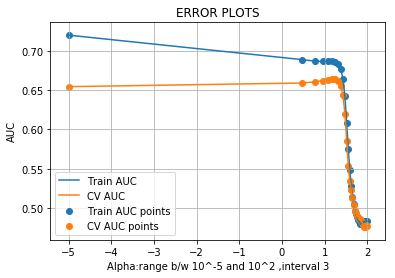

In [56]:
plt.plot(np.log10(Alpha), train_auc, label='Train AUC')
plt.plot(np.log10(Alpha), cv_auc, label='CV AUC')

plt.scatter(np.log10(Alpha), train_auc, label='Train AUC points')
plt.scatter(np.log10(Alpha), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha:range b/w 10^-5 and 10^2 ,interval 3")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [57]:
max_auc_index=np.argsort(cv_auc)[:len(cv_auc)-10:-1]
max_auc_index

array([5, 6, 4, 3, 7, 2, 1, 8, 0], dtype=int64)

In [58]:
Alpha_which_gave_max_auc=np.array(Alpha)[[max_auc_index]]
Alpha_which_gave_max_auc

array([1.500001e+01, 1.800001e+01, 1.200001e+01, 9.000010e+00,
       2.100001e+01, 6.000010e+00, 3.000010e+00, 2.400001e+01,
       1.000000e-05])

In [61]:
max_alpha = Alpha_which_gave_max_auc[0]
max_alpha_6 = Alpha_which_gave_max_auc[6]
print("max_alpha : {}\nmax_alpha_10 : {}".format(max_alpha,max_alpha_6))

max_alpha : 15.00001
max_alpha_10 : 3.00001


In [62]:
cv_auc1=max(cv_auc)
Alpha_max = Alpha[np.argmax(cv_auc)]
print("Max CV_AUC for alpha ranges between 10^-5 to 10^2 : ",cv_auc1)
print("ALPHA value which gives highest AUC : ",Alpha_max)

Max CV_AUC for alpha ranges between 10^-5 to 10^2 :  0.6640169749434155
ALPHA value which gives highest AUC :  15.00001


### From the above graph it is clear that auc is high between alpha value of 3 and 16, so we will choose Laplas smoothing value between 3 and 16 and plot the AUC

In [63]:
train_auc = []
cv_auc = []
Alpha = list(np.arange(3,16,0.1))
for i in (Alpha):
    NB = MultinomialNB(alpha=i,class_prior=[0.5,0.5])
    NB.fit(Set1_train,Y_train)

    y_train_pred = batch_predict(NB, Set1_train)    
    y_cv_pred = batch_predict(NB, Set1_cv)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(Y_train,y_train_pred))
    cv_auc.append(roc_auc_score(Y_cv, y_cv_pred))


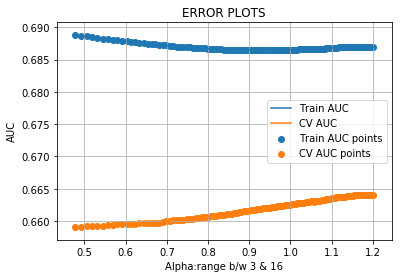

In [65]:
plt.plot(np.log10(Alpha), train_auc, label='Train AUC')
plt.plot(np.log10(Alpha), cv_auc, label='CV AUC')

plt.scatter(np.log10(Alpha), train_auc, label='Train AUC points')
plt.scatter(np.log10(Alpha), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha:range b/w 3 & 16")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [67]:
cv_auc2=max(cv_auc)
Alpha_max_value = Alpha[np.argmax(cv_auc)] #alpha value which gave high AUC
print("Max CV_AUC for alpha ranges between 3 to 16 :", cv_auc2)
print("ALPHA value which gives highest AUC : ",Alpha_max_value)

Max CV_AUC for alpha ranges between 3 to 16 : 0.664045730477113
ALPHA value which gives highest AUC :  14.900000000000011


##### From above graph we can see that max AUC is 0.664 @ alpha value of 14.900

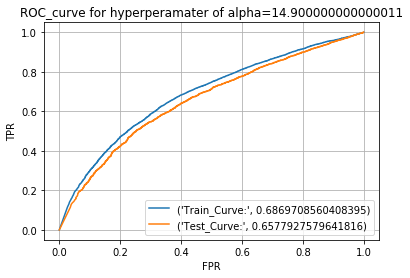

In [68]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

NB_best_alpha_model = MultinomialNB(alpha=Alpha_max_value,class_prior=[0.5,0.5])
NB_best_alpha_model.fit(Set1_train,Y_train)
y_train_pred = batch_predict(NB_best_alpha_model, Set1_train)
FPR_Tr,TPR_Tr,TH_Tr = roc_curve(y_true=Y_train,y_score=y_train_pred)
y_test_pred = batch_predict(NB_best_alpha_model, Set1_test)
FPR_te,TPR_te,TH_te = roc_curve(y_true=Y_test,y_score=y_test_pred)
sco_tr = roc_auc_score(y_true=Y_train,y_score=y_train_pred)
sco_te = roc_auc_score(y_true=Y_test,y_score=y_test_pred)
plt.plot(FPR_Tr,TPR_Tr,label = ("Train_Curve:",sco_tr))
plt.plot(FPR_te,TPR_te,label = ("Test_Curve:",sco_te))
plt.title("ROC_curve for hyperperamater of alpha=14.900000000000011")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()

In [69]:
#confusion matrix with predict function
from sklearn.metrics import confusion_matrix
confusion= confusion_matrix(y_true=Y_test,y_pred=NB_best_alpha_model.predict(Set1_test))
confusion

array([[ 474, 1127],
       [1308, 7091]], dtype=int64)

In [70]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.3869886803543356 for threshold -0.0


Text(0.5,1,'Confusion matrix for Test data')

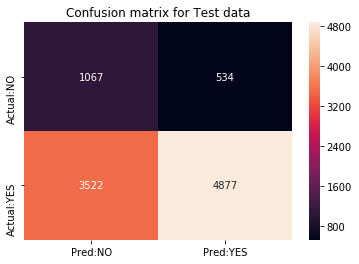

In [71]:
import seaborn
confusion_mat= pd.DataFrame(metrics.confusion_matrix(Y_test, predict(y_test_pred, TH_te, FPR_te, TPR_te)))
seaborn.heatmap(confusion_mat,annot=True, fmt="d",xticklabels=["Pred:NO","Pred:YES"],yticklabels=["Actual:NO","Actual:YES"])
plt.title("Confusion matrix for Test data")

In [72]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, TH_Tr, FPR_Tr, TPR_Tr)))
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, TH_te, FPR_te, TPR_te)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4161849937606353 for threshold -0.0
[[ 3406  1719]
 [10045 16830]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3869886803543356 for threshold -0.0
[[1067  534]
 [3522 4877]]


#### 2.4.1.1 Top 10 important features of positive class from<font color='red'> SET 1</font>

In [73]:
positive=list(np.argsort((NB_best_alpha_model.feature_log_prob_)[1]))
positive.reverse()
positive_featuers=np.array(all_featuers)[np.array(positive[:10])]
positive_featuers

array(['Price', 'students', 'school', 'classroom', 'learning', 'not',
       'learn', 'help', 'many', 'nannan'], dtype='<U20')

In [74]:
np.array(positive[:10])

array([  99, 8828, 8019, 1794, 5330, 6197, 5326, 4405, 5636, 6058],
      dtype=int64)

#### 2.4.1.2 Top 10 important features of negative class from<font color='red'> SET 1</font>

In [75]:
negetive=list(np.argsort((NB_best_alpha_model.feature_log_prob_)[0]))
negetive.reverse()
negetive_featuers=np.array(all_featuers)[np.array(negetive[:10])]
negetive_featuers

array(['Price', 'students', 'school', 'learning', 'classroom', 'not',
       'learn', 'help', 'many', 'nannan'], dtype='<U20')

In [76]:
#index of top 10 negative class features
np.array(negetive[:10])

array([  99, 8828, 8019, 5330, 1794, 6197, 5326, 4405, 5636, 6058],
      dtype=int64)

In [77]:
NB_best_alpha_model.feature_count_[0][np.array(negetive[:10])]

array([1992135.25,   35520.  ,   11764.  ,    8573.  ,    7671.  ,
          6352.  ,    6174.  ,    5824.  ,    4797.  ,    4726.  ])

### 2.4.2 Applying Naive Bayes on TFIDF,<font color='red'> SET 2</font>

In [78]:
print("Categorical_numerical_features_X_train_stack :{0}\nCategorical_numerical_features_X_cv_stack :{1}\
        \nCategorical_numerical_features_X_test_stack :{2}\
        \nEssay_tfidf_X_train :{3}\nEssay_tfidf_X_cv :{4}\nEssay_tfidf_X_test :{5}\
        \nProject_title_tfidf_X_train :{6}\nProject_title_tfidf_X_cv :{7}\nProject_title_tfidf_X_test :{8}".\
        format(categorical_numerical_features_X_train_stack.shape,\
         categorical_numerical_features_X_cv_stack.shape,\
         categorical_numerical_features_X_test_stack.shape,\
         essay_tfidf_X_train.shape,essay_tfidf_X_cv.shape,essay_tfidf_X_test.shape,\
         project_title_tfidf_X_train.shape,project_title_tfidf_X_cv.shape,project_title_tfidf_X_test.shape))

Categorical_numerical_features_X_train_stack :(32000, 100)
Categorical_numerical_features_X_cv_stack :(8000, 100)        
Categorical_numerical_features_X_test_stack :(10000, 100)        
Essay_tfidf_X_train :(32000, 10071)
Essay_tfidf_X_cv :(8000, 10071)
Essay_tfidf_X_test :(10000, 10071)        
Project_title_tfidf_X_train :(32000, 1458)
Project_title_tfidf_X_cv :(8000, 1458)
Project_title_tfidf_X_test :(10000, 1458)


In [79]:
Set2_train=hstack((categorical_numerical_features_X_train_stack,essay_tfidf_X_train,project_title_tfidf_X_train)).toarray()
Set2_cv=hstack((categorical_numerical_features_X_cv_stack,essay_tfidf_X_cv,project_title_tfidf_X_cv)).toarray()
Set2_test=hstack((categorical_numerical_features_X_test_stack,essay_tfidf_X_test,project_title_tfidf_X_test)).toarray()

#### Same as we did for Set1 we will go with wide range of hyper paramater values and break it down to small values based on the outcome 

In [80]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
Alpha = list(np.arange(10**-5,10**2,3))
for i in (Alpha):
    NB = MultinomialNB(alpha=i,class_prior=[0.5,0.5])
    NB.fit(Set2_train,Y_train)

    y_train_pred = batch_predict(NB, Set2_train)    
    y_cv_pred = batch_predict(NB, Set2_cv)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(Y_train,y_train_pred))
    cv_auc.append(roc_auc_score(Y_cv, y_cv_pred))


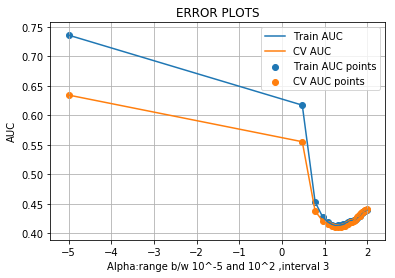

In [82]:
plt.plot(np.log10(Alpha), train_auc, label='Train AUC')
plt.plot(np.log10(Alpha), cv_auc, label='CV AUC')

plt.scatter(np.log10(Alpha), train_auc, label='Train AUC points')
plt.scatter(np.log10(Alpha), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha:range b/w 10^-5 and 10^2 ,interval 3")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [83]:
max_auc_index=np.argsort(cv_auc)[:len(cv_auc)-10:-1]
max_auc_index

array([ 0,  1, 33, 31, 32, 30, 29,  2, 28], dtype=int64)

In [84]:
Alpha_which_gave_max_auc=np.array(Alpha)[[max_auc_index]]
Alpha_which_gave_max_auc

array([1.000000e-05, 3.000010e+00, 9.900001e+01, 9.300001e+01,
       9.600001e+01, 9.000001e+01, 8.700001e+01, 6.000010e+00,
       8.400001e+01])

In [87]:
max_alpha = Alpha_which_gave_max_auc[0]
max_alpha_6 = Alpha_which_gave_max_auc[6]
print("max_alpha : {}\nmax_alpha_6 : {}".format(max_alpha,max_alpha_6))

max_alpha : 1e-05
max_alpha_6 : 87.00001


In [92]:
cv_auc=max(cv_auc)
Alpha_max = Alpha[np.argmax(cv_auc)]
print("Max CV_AUC for alpha ranges between 10^-5 to 10^2 : ",cv_auc)
print("ALPHA value which gives highest AUC : ",Alpha_max)

Max CV_AUC for alpha ranges between 10^-5 to 10^2 :  0.6343524178291744
ALPHA value which gives highest AUC :  1e-05


##### The AUC looks maximum below 2 so we will select low value  and find the right hyper-paramater

In [93]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score


train_auc = []
cv_auc = []
Alpha = list(np.arange(0.00001,2,0.01))
for i in (Alpha):
    NB = MultinomialNB(alpha=i,class_prior=[0.5,0.5])
    NB.fit(Set2_train,Y_train)

    y_train_pred = batch_predict(NB, Set2_train)    
    y_cv_pred = batch_predict(NB, Set2_cv)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(Y_train,y_train_pred))
    cv_auc.append(roc_auc_score(Y_cv, y_cv_pred))



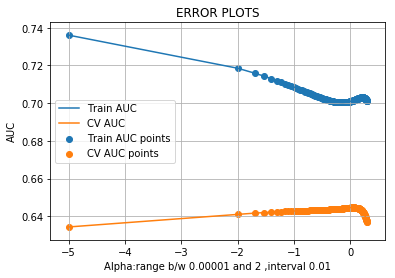

In [94]:
plt.plot(np.log10(Alpha), train_auc, label='Train AUC')
plt.plot(np.log10(Alpha), cv_auc, label='CV AUC')

plt.scatter(np.log10(Alpha), train_auc, label='Train AUC points')
plt.scatter(np.log10(Alpha), cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha:range b/w 0.00001 and 2 ,interval 0.01")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [95]:
cv_auc3=max(cv_auc)
Alpha_max_value = Alpha[np.argmax(cv_auc)] #alpha value which gave high AUC
print("max CV_AUC for alpha ranges between 0.00001 to 1.2 : ",cv_auc3)
print("ALPHA value which gives highest AUC : ",Alpha_max_value)

max CV_AUC for alpha ranges between 0.00001 to 1.2 :  0.6446967418179469
ALPHA value which gives highest AUC :  1.16001


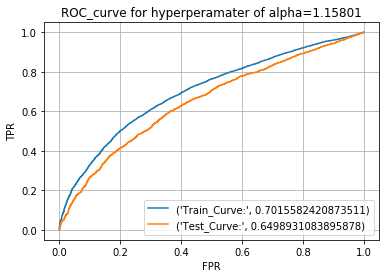

In [96]:
NB_best_alpha_mode2 = MultinomialNB(alpha=Alpha_max_value,class_prior=[0.5,0.5])
NB_best_alpha_mode2.fit(Set2_train,Y_train)
y_train_pred = batch_predict(NB_best_alpha_mode2, Set2_train)
FPR_Tr,TPR_Tr,TH_Tr = roc_curve(y_true=Y_train,y_score=y_train_pred)
y_test_pred = batch_predict(NB_best_alpha_mode2, Set2_test)
FPR_te,TPR_te,TH_te = roc_curve(y_true=Y_test,y_score=y_test_pred)
sco_tr = roc_auc_score(y_true=Y_train,y_score=y_train_pred)
sco_te = roc_auc_score(y_true=Y_test,y_score=y_test_pred)
plt.plot(FPR_Tr,TPR_Tr,label = ("Train_Curve:",sco_tr))
plt.plot(FPR_te,TPR_te,label = ("Test_Curve:",sco_te))
plt.title("ROC_curve for hyperperamater of alpha=1.15801")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid()

In [97]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.38178022888569985 for threshold -0.346


Text(0.5,1,'Confusion matrix for Test data')

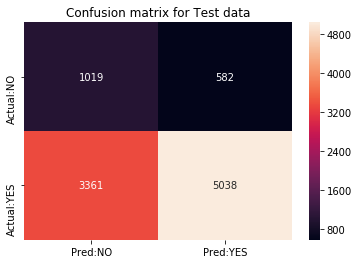

In [98]:
confusion_mat= pd.DataFrame(metrics.confusion_matrix(Y_test, predict(y_test_pred, TH_te, FPR_te, TPR_te)))
seaborn.heatmap(confusion_mat,annot=True, fmt="d",xticklabels=["Pred:NO","Pred:YES"],yticklabels=["Actual:NO","Actual:YES"])
plt.title("Confusion matrix for Test data")

#### 2.4.2.1 Top 10 important features of positive class from<font color='red'> SET 2</font>

In [99]:
positive=list(np.argsort((NB_best_alpha_mode2.feature_log_prob_)[1]))
positive.reverse()
positive_featuers=np.array(all_featuers)[np.array(positive[:10])]
positive_featuers

array(['Price', 'Mrs', 'GradeA', 'Ms', 'GradeB', 'Literacy',
       'Mathematics', 'Literature_Writing', 'GradeC', 'ca'], dtype='<U20')

In [100]:
np.array(positive[:10])

array([99, 92, 95, 93, 96, 38, 37, 36, 97, 43], dtype=int64)

#### 2.4.2.1 Top 10 important features of negative class from<font color='red'> SET 2</font>

In [101]:
negetive=list(np.argsort((NB_best_alpha_mode2.feature_log_prob_)[0]))
negetive.reverse()
negetive_featuers=np.array(all_featuers)[np.array(negetive[:10])]
negetive_featuers

array(['Price', 'Mrs', 'GradeA', 'Ms', 'GradeB', 'Literacy',
       'Mathematics', 'Literature_Writing', 'GradeC', 'ca'], dtype='<U20')

In [102]:
np.array(negetive[:10])

array([99, 92, 95, 93, 96, 38, 37, 36, 97, 43], dtype=int64)

<h1>3. Conclusions</h1>

In [1]:
from prettytable import PrettyTable

In [2]:
x = PrettyTable()

x.field_names = ["Feature sets","Model" ,"Hyperparamater" ,"Train AUC", "CV AUC", "Test AUC"]

x.add_row(["BOW","Brut" ,14.9000,0.687, 0.664, 0.658])
x.add_row(["TFIDF","Brut" ,1.16001 ,0.702, 0.644, 0.650])
print(x)

+--------------+-------+----------------+-----------+--------+----------+
| Feature sets | Model | Hyperparamater | Train AUC | CV AUC | Test AUC |
+--------------+-------+----------------+-----------+--------+----------+
|     BOW      |  Brut |      14.9      |   0.687   | 0.664  |  0.658   |
|    TFIDF     |  Brut |    1.16001     |   0.702   | 0.644  |   0.65   |
+--------------+-------+----------------+-----------+--------+----------+
